<br>

### Importando as bibliotecas
<br>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<br>

### Importando os dados 
<br>

In [46]:
df_houses = pd.read_csv("brazilian_houses_to_rent/houses_to_rent_v2.csv", sep=",")

In [47]:
#verificando
df_houses.head()

#deu certo

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [48]:
df = df_houses.copy()

#verificando
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


<br>

### Renomeando as colunas
<br>

In [49]:
df.columns = [col.lower().replace(" ", "") for col in df.columns]


#o inplace=True já vai salvar as alterações no dataframe sem precisar armazenar em uma nova variável
df.rename(columns={"parkingspaces":"parking_spaces", 
                   "hoa(r$)":"hoa",
                   "rentamount(r$)":"rent_amount",
                   "propertytax(r$)":"property_tax",
                   "fireinsurance(r$)":"fire_insurance","total(r$)":
                   "total"}, inplace=True)

#verificando
df.columns
#deu certo

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent_amount', 'property_tax',
       'fire_insurance', 'total'],
      dtype='object')

<br>

### Análise sobre o custo total do aluguel por cidade
<br>

#### Observações
- São Paulo possui o maior somatório de custo total no aluguel de imóveis. Isso quer dizer que:
    - ou possui maior número de imóveis disponíveis e/ou custo mais caro (mesmo tendo menos imóveis)


- Rio de Janeiro segue com o 2° lugar, seguido pela capital mineira
    - RJ e SP são os lugares mais procurados porque é "onde a coisa acontece" no Brasil
    - BH tem quase o mesmo valor do RJ, porque apesar de ser também uma das principais cidades do país, possui o 
    custo de vida extremamente elevado, chegando a ser mais caro que SP em alguns aspectos como mensalidade escolar
    
    
- O estado de SP é tão influente, que apesar de Campinas não ser uma capital, é uma cidade muito procurada devido às indústrias e universidades, tem quase a mesma soma de custos que POA (levando em consideração que POA tem maior população).

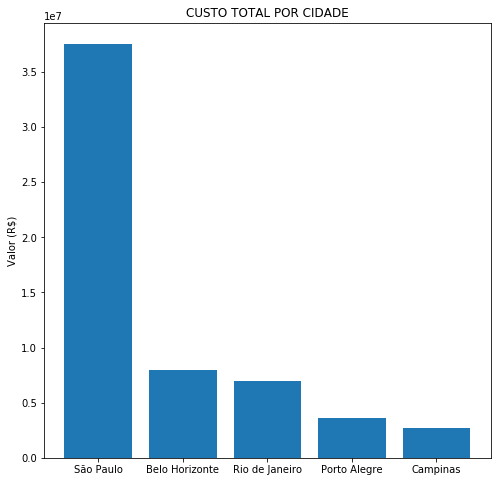

In [50]:
summary = df.groupby("city").total.sum()
summary = summary.sort_values(ascending=False) #o ascending é pra ordenar do maior para o menor
summary.index

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

z=summary
indi = np.arange(len(summary))
ax1.bar(indi, z)

ax1.set_xticks(indi)
ax1.set_xticklabels(summary.index)

ax1.set_title("Custo total por cidade".upper(), fontsize=12, loc="center")
ax1.set_ylabel("Valor (R$)", fontsize=10);

<br>

### Criando alguns cargos hierárquicos que ajudem a explicar os gastos com a moradia

- Os cargos foram separados de acordo com a faixa total de gastos com o aluguel;
- A partir da nova coluna criada "poder_aquisitivo", gráficos foram criados para avaliar a média de gastos por cada profissão,
além de um comparativo de gastos feito por dois pares de cargos de hierarquias próximas.


<br>

<br>

<i> Criando os cargos e adicionando-os à nova coluna "poder_aquisitivo"


In [51]:
#definindo os intervalos
bin_edges = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 9000, 12000, 100000]

#definindo os rótulos dos intervalos
labels = ["Estagiário", "Assistente", "Trainee", "Analista Jr",\
          "Analista PL","Analista Sr", "Gerente Jr", "Gerente PL",\
          "Gerente Sr","Vice Presidente", "CEO" ]

#usar o pd.cut para segmentar os dados de acordo com as faixas determinadas
df["poder_aquisitivo"] = pd.cut(df["total"],bin_edges, labels=labels)

#verificando
df.head(10)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total,poder_aquisitivo
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,Gerente Jr
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,Gerente Sr
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,Analista PL
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,Trainee
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,Assistente
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955,Gerente Sr
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750,Analista Jr
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253,Gerente Sr
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440,CEO
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955,Analista Jr


<br>

<i> Criando o gráfico com a média de gastos por cargo

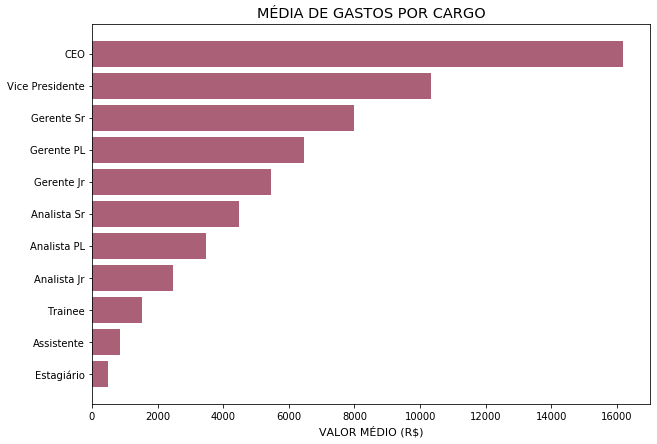

In [52]:
plt.figure(figsize=(10,7))
summary2 = df.groupby("poder_aquisitivo").total.mean()

ind2 = np.arange(len(summary2))
plt.barh(ind2, summary2, color="#AA6076")

plt.title("Média de gastos por cargo".upper(), fontsize=14.5)
plt.xlabel("Valor Médio (R$)".upper(), fontsize=11)

plt.yticks(ind2, summary2.index);

#para salvar a figura
#plt.savefig("spents_by_customer.png", dpi=300, quality=90, transparent=True);

In [53]:
summary

city
São Paulo         37563957
Belo Horizonte     7944575
Rio de Janeiro     6922139
Porto Alegre       3566811
Campinas           2706805
Name: total, dtype: int64

<br>

<i> Comparativo entre os pares de cargos de hierarquias próximas

#### Observações

- No comparativo entre o CEO e o Vice Presidente, foi possível observar que em ambos os cargos, com exceção de Porto Alegre, todas as outras cidades apresentaram igualdade nos gastos mínimos com aluguel. Vale lembrar que a média salarial de um vice presidente é de 27 mil/mês e um CEO é de 50 mil/mês. 
- Ao se comparar os cargos de Trainee e Analista Jr que possuem média salarial de 5 mil/mês e 6.200/mês, respectivamente, foi possível observar que apenas na cidade de Belo Horizonte os gastos são mais próximos, ao passo que nas demais cidadesa diferença nos gastos por parte de cada cargo é consideravelmente diferente. Isso pode ser explicado pelo gráfico do custo total por cidade (situado mais acima neste notebook), que mostra que o custo do aluguel em Belo Horizonte é bem alto, ficando atrás apenas de São Paulo, o que leva a crer que SP tem custos mais altos por conta da maior quantidade de imóveis disponíveis, ao passo que BH tem custo mais alto porque se trata de uma cidade mais cara para se viver.

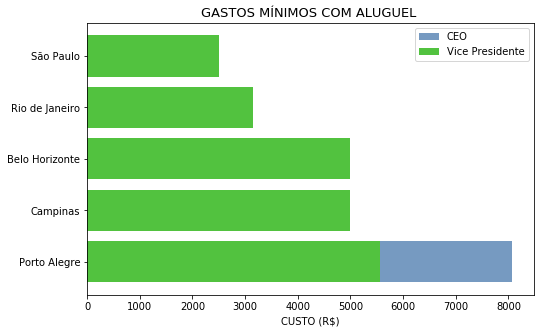

In [61]:
plt.figure(figsize=(8,5))
y = df[df["poder_aquisitivo"]== "CEO"]
y4 = df[df["poder_aquisitivo"]== "Vice Presidente"]

summary2 = y.groupby("city").rent_amount.min()
summary4 = y4.groupby("city").rent_amount.min()

summary2 = summary2.sort_values(ascending=False)
summary4 = summary4.sort_values(ascending=False)


ind2 = np.arange(len(summary2))
ind4 = np.arange(len(summary4))

plt.barh(ind2, summary2, color="#769AC1", label="CEO")
plt.barh(ind4,summary4, color="#52C23F", label="Vice Presidente")

plt.title("Gastos mínimos com aluguel ".upper(), fontsize=13)
plt.xlabel("Custo (R$)".upper(), fontsize=10)

plt.yticks(ind2, summary2.index)
plt.yticks(ind4, summary4.index)

plt.legend()
plt.show();

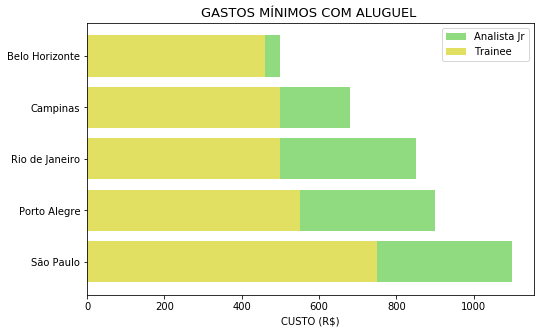

In [62]:
plt.figure(figsize=(8,5))
y = df[df["poder_aquisitivo"]== "Analista Jr"]
y4 = df[df["poder_aquisitivo"]== "Trainee"]

summary2 = y.groupby("city").rent_amount.min()
summary4 = y4.groupby("city").rent_amount.min()

summary2 = summary2.sort_values(ascending=False)
summary4 = summary4.sort_values(ascending=False)


ind2 = np.arange(len(summary2))
ind4 = np.arange(len(summary4))

plt.barh(ind2, summary2, color="#90DB80", label="Analista Jr")
plt.barh(ind4,summary4, color="#E2E062", label="Trainee")

plt.title("Gastos mínimos com aluguel ".upper(), fontsize=13)
plt.xlabel("Custo (R$)".upper(), fontsize=10)

plt.yticks(ind2, summary2.index)
plt.yticks(ind4, summary4.index)

plt.legend()
plt.show();